<a href="https://colab.research.google.com/github/NavyaPatil1011/Deep_learning_and_gen_ai_lab/blob/main/Week1_Single_Unit_Perceptron_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

a. Design a single unit perceptron for classification of a linearly separable binary dataset (placement.csv)
without using pre-defined models. Use the Perceptron() from sklearn.

Weights: [[11. 47.]]
Intercept: [-72.]
Accuracy score is 0.5


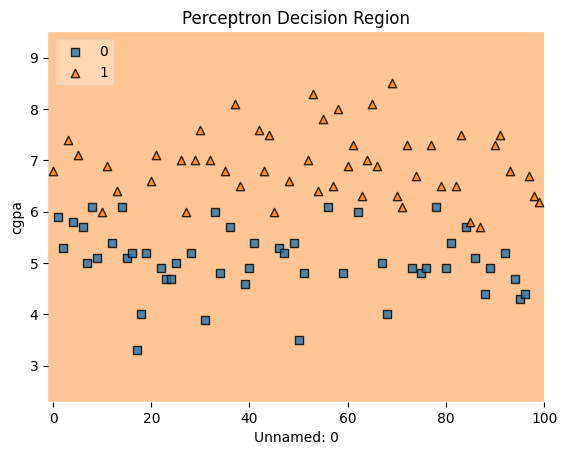

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import LabelEncoder
from mlxtend.plotting import plot_decision_regions

# Load data
df = pd.read_csv('placement.csv')

# Assuming first two columns are numeric features
X = df.iloc[:, 0:2].values

# Encode labels if they are categorical
y = df.iloc[:, -1]
le = LabelEncoder()
y = le.fit_transform(y)

# Train perceptron
p = Perceptron()
p.fit(X, y)

# Print weights and score
print("Weights:", p.coef_)
print("Intercept:", p.intercept_)
print("Accuracy score is", p.score(X, y))

# Plot decision boundary
plot_decision_regions(X, y, clf=p, legend=2)
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.title('Perceptron Decision Region')
plt.show()


Exercise:
Design a single unit perceptron for classification of a linearly separable binary dataset without using pre-defined
models. Use the Perceptron() from sklearn.

In [4]:
#hint-use make_classification() to generate binary dataset from sklearn
#Eg:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=100, n_features=2,
n_informative=1,n_redundant=0,n_classes=2, n_clusters_per_class=1,
random_state=41,hypercube=False,class_sep=10)

Identify the problem with single unit Perceptron. Classify using Or-, And- and Xor-ed data and analyse the result.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but Perceptron was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but Perceptron was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but Perceptron was fitted without feature names
  warnings.warn(


AND Perceptron: Coef = [[2. 2.]] Intercept = [-2.] Accuracy = 1.0
OR Perceptron: Coef = [[2. 2.]] Intercept = [-1.] Accuracy = 1.0
XOR Perceptron: Coef = [[0. 0.]] Intercept = [0.] Accuracy = 0.5


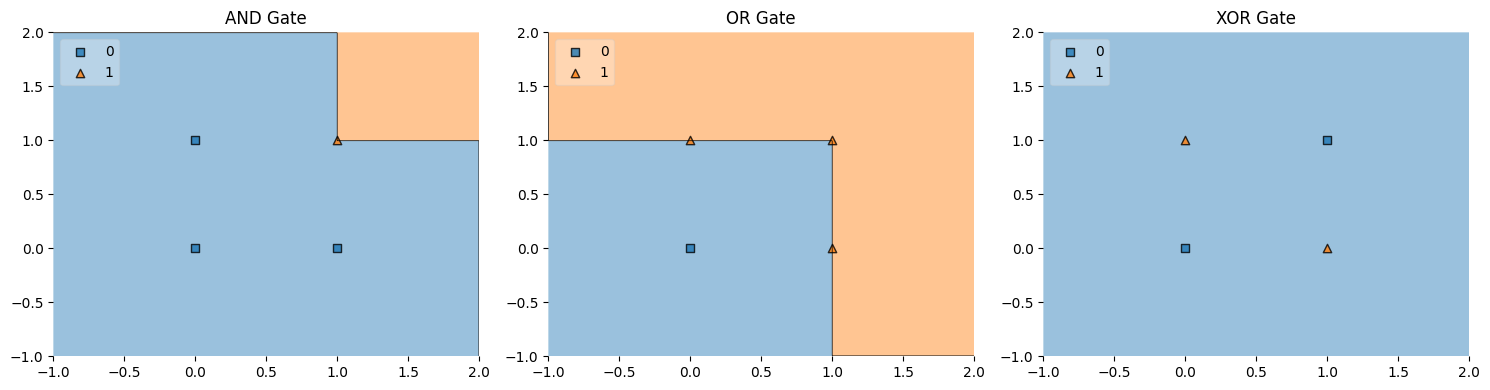

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from mlxtend.plotting import plot_decision_regions

# Logic gate data
or_data = pd.DataFrame({'input1':[1,1,0,0], 'input2':[1,0,1,0], 'output':[1,1,1,0]})
and_data = pd.DataFrame({'input1':[1,1,0,0], 'input2':[1,0,1,0], 'output':[1,0,0,0]})
xor_data = pd.DataFrame({'input1':[1,1,0,0], 'input2':[1,0,1,0], 'output':[0,1,1,0]})

# Initialize Perceptrons
clf_and = Perceptron()
clf_or = Perceptron()
clf_xor = Perceptron()

# Train
clf_and.fit(and_data.iloc[:, 0:2].values, and_data['output'].values)
clf_or.fit(or_data.iloc[:, 0:2].values, or_data['output'].values)
clf_xor.fit(xor_data.iloc[:, 0:2].values, xor_data['output'].values)

# Print weights and accuracy
print("AND Perceptron: Coef =", clf_and.coef_, "Intercept =", clf_and.intercept_, "Accuracy =", clf_and.score(and_data.iloc[:,0:2], and_data['output']))
print("OR Perceptron: Coef =", clf_or.coef_, "Intercept =", clf_or.intercept_, "Accuracy =", clf_or.score(or_data.iloc[:,0:2], or_data['output']))
print("XOR Perceptron: Coef =", clf_xor.coef_, "Intercept =", clf_xor.intercept_, "Accuracy =", clf_xor.score(xor_data.iloc[:,0:2], xor_data['output']))

# Plot decision boundaries
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plot_decision_regions(and_data.iloc[:, 0:2].values, and_data['output'].values, clf=clf_and, legend=2)
plt.title("AND Gate")

plt.subplot(1, 3, 2)
plot_decision_regions(or_data.iloc[:, 0:2].values, or_data['output'].values, clf=clf_or, legend=2)
plt.title("OR Gate")

plt.subplot(1, 3, 3)
plot_decision_regions(xor_data.iloc[:, 0:2].values, xor_data['output'].values, clf=clf_xor, legend=2)
plt.title("XOR Gate")

plt.tight_layout()
plt.show()
